In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime

In [2]:
file = "/home/delta/devel/spotthedifference/michael/data/connor_2020-02-10T13_39_00-07_00.geojson"
df = gpd.read_file(file)

In [3]:
df["timestamp_dt"] = df["timestamp"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
df_departures = df.loc[df["detect_type"] == "Departure"]
df_arrivals = df.loc[df["detect_type"] == "Arrival"]

In [4]:
def group_df_by_month(df, timestamp_col="timestamp_dt"):
    return df.groupby([
        df[timestamp_col].apply(lambda x: x.year),
        df[timestamp_col].apply(lambda x: x.month)
    ])

def create_summary_graph(departures, arrivals, colname):
    departures_by_month = group_df_by_month(departures)
    arrivals_by_month = group_df_by_month(arrivals)
    
    max_col_departures_per_month = departures_by_month[colname].max()
    max_col_arrivals_per_month = arrivals_by_month[colname].max()
    p75_col_departures_per_month = departures_by_month[colname].quantile(.75)
    p75_col_arrivals_per_month = arrivals_by_month[colname].quantile(.75)
    p50_col_departures_per_month = departures_by_month[colname].quantile(.50)
    p50_col_arrivals_per_month = arrivals_by_month[colname].quantile(.50)
    
    fig, ax = plt.subplots(figsize=(15,12))
    max_col_departures_per_month.plot(label="%s: max" % colname, ax=ax, color="red")
    max_col_arrivals_per_month.plot(label="%s: max" % colname, ax=ax, color="blue")
    p75_col_departures_per_month.plot(label="%s: 75th %%ile" % colname, ax=ax, color="orange")
    p75_col_arrivals_per_month.plot(label="%s: 75th %%ile" % colname, ax=ax, color="cyan")
    p50_col_departures_per_month.plot(label="%s: median" % colname, ax=ax, color="pink")
    p50_col_arrivals_per_month.plot(label="%s: median" % colname, ax=ax, color="navy")
    ax.set_title("Graph of %s per month" % colname)#, color="white")
    ax.set_xlabel("Month")#, color="white")
    ax.set_ylabel(colname)#, color="white")
    ax.legend()
    #ax.tick_params(axis="x", colors="white")
    #ax.tick_params(axis="y", colors="white")

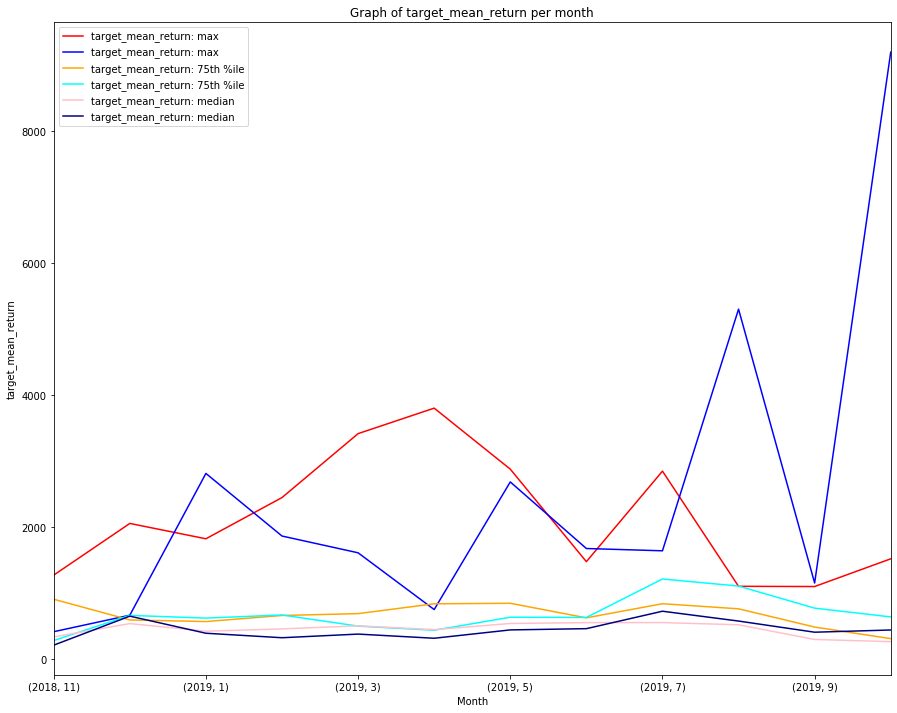

In [5]:
create_summary_graph(df_departures, df_arrivals, "target_mean_return")

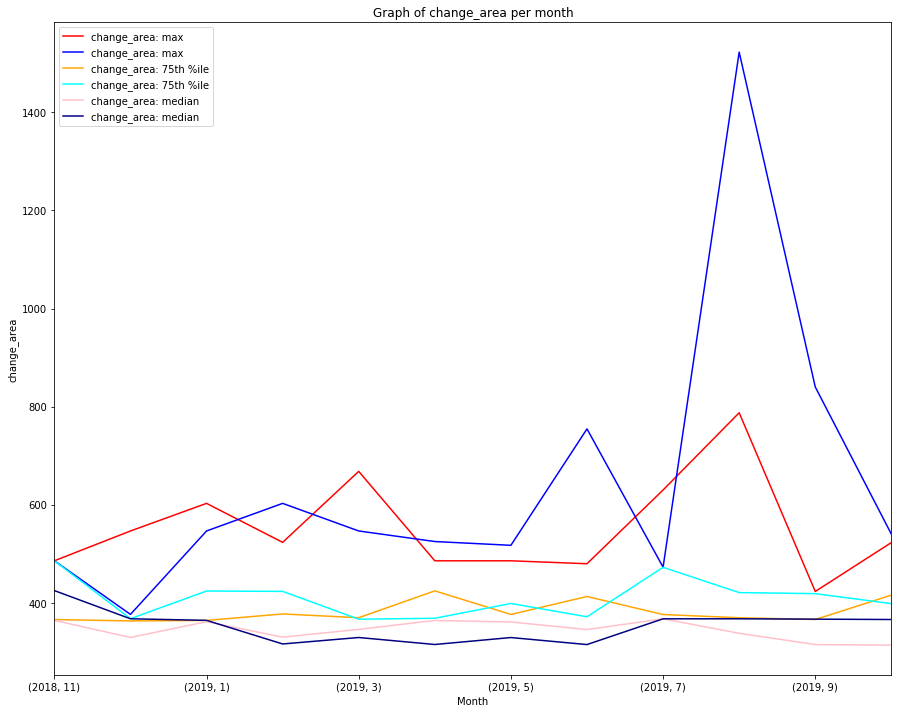

In [6]:
create_summary_graph(df_departures, df_arrivals, "change_area")

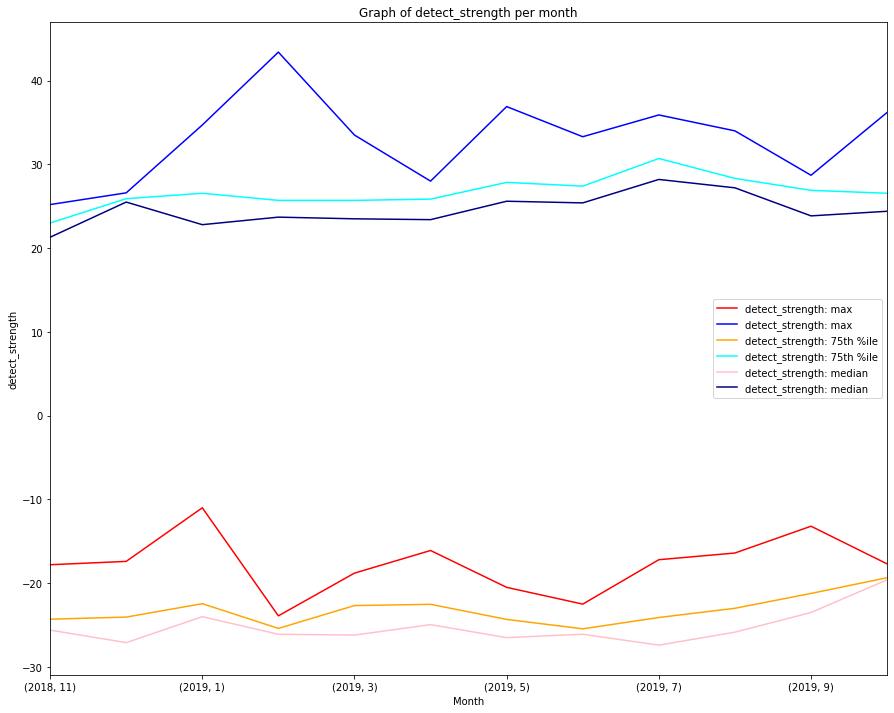

In [7]:
create_summary_graph(df_departures, df_arrivals, "detect_strength")

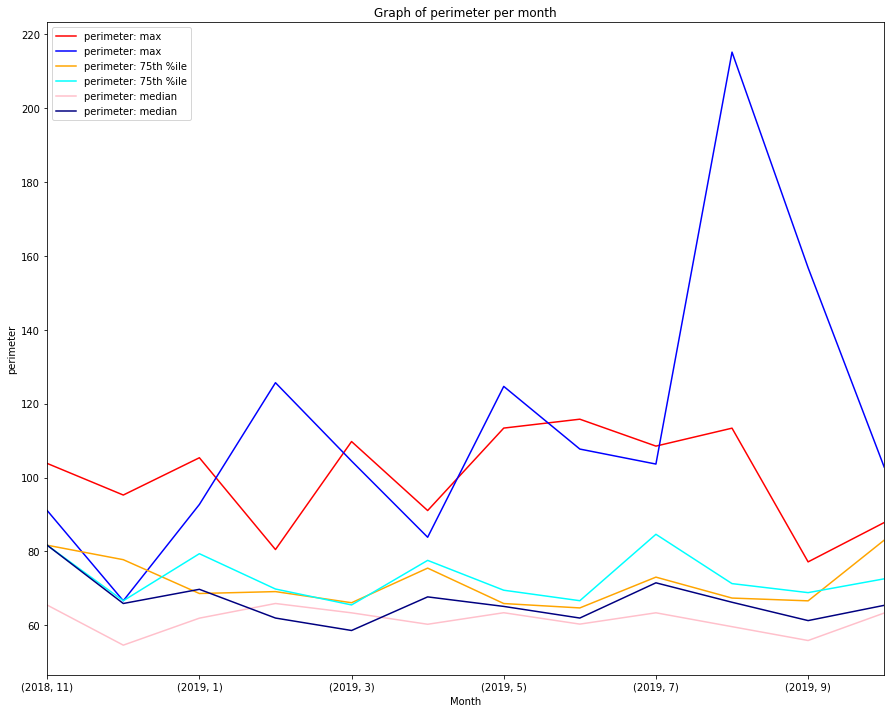

In [8]:
create_summary_graph(df_departures, df_arrivals, "perimeter")

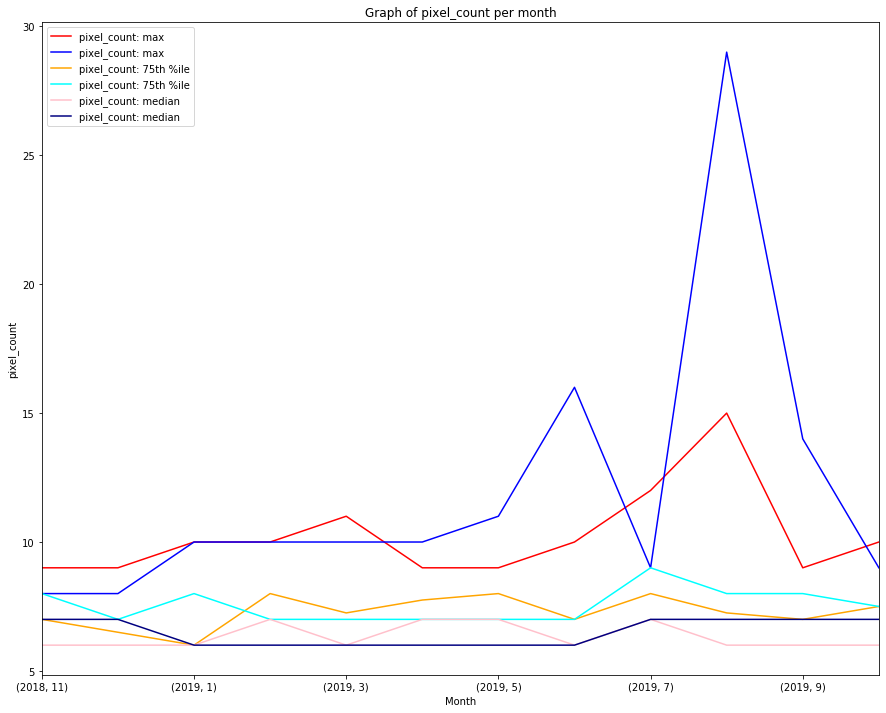

In [9]:
create_summary_graph(df_departures, df_arrivals, "pixel_count")